## Ch 3 인공신경망 (Artificial Neural Network)

### 데이터 전처리 (preprocessing)

Standardization (표준화) : 표준 정규 분포 등 표준 함수로 변환  
Normalization (정규화) : 0 ~ 1 의 값으로 정규화

In [1]:
import numpy as np

x_train = [1,2,3,4,5,6,7,8]
x_test = [1.2,1.5,3.5,4.5,6.5,7.8]


def normalization(d_train, d_test=None):   # 데이터 정규화 함수
    min_vars = np.min(d_train, axis=0)
    max_vars = np.max(d_train, axis=0)
    if d_test is None:
        return (d_train - min_vars) / (max_vars - min_vars)
    else:
        return (d_train - min_vars) / (max_vars - min_vars), (d_test - min_vars) / (max_vars - min_vars)

def standardization(d_train, d_test=None): # 데이터 표준화 함수
    mean_vars = np.mean(d_train, axis=0)
    std_vars = np.std(d_train, axis=0)
    if d_test is None:
        return (d_train - mean_vars) / std_vars
    else:
        return (d_train - mean_vars) / std_vars, (d_test - mean_vars) / std_vars

# 데이터 정규화 및 표준화 적용
x_train_nrm, x_test_nrm = normalization(x_train, x_test)
x_train_std, x_test_std = standardization(x_train, x_test)
print('max(x_nrm): %.4f \tmin(x_nrm): %.4f'%(np.max(x_train_nrm), np.min(x_train_nrm)))
print('mean(x_std): %.4f\tstd (x_std): %.4f'% (np.mean(x_train_std), np.std (x_train_std)))


max(x_nrm): 1.0000 	min(x_nrm): 0.0000
mean(x_std): 0.0000	std (x_std): 1.0000


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_train = np.reshape(x_train,(-1,1))

minmax = MinMaxScaler()
x_train_nrm = minmax.fit_transform(x_train)

std = StandardScaler()
x_train_std = std.fit_transform(x_train)

print('max(x_nrm): %.4f \tmin(x_nrm): %.4f'%(np.max(x_train_nrm), np.min(x_train_nrm)))
print('mean(x_std): %.4f\tstd (x_std): %.4f'% (np.mean(x_train_std), np.std (x_train_std)))


max(x_nrm): 1.0000 	min(x_nrm): 0.0000
mean(x_std): 0.0000	std (x_std): 1.0000


## 인공신경망 - Multilayer Perceptron
### 퍼셉트론 및 다층 신경망 (≅ 인공신경망) 구조  
-  단 하나의 직선을 그어 파란색 원과 붉은색 사각형을 분류할 수 있는가?  

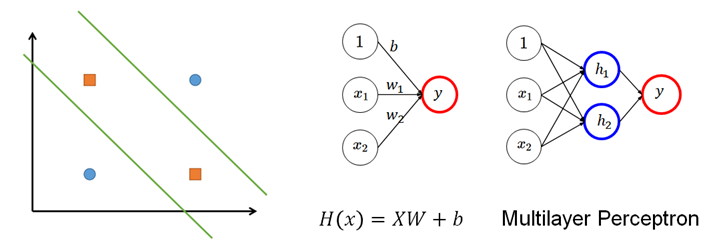


## XOR logic gate 학습 : 로지스틱 회귀분석 vs. MLP
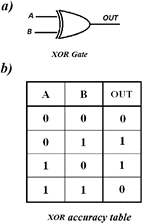;
### 1. 로지스틱 회귀분석

Recall, 로지스틱 회귀분석   
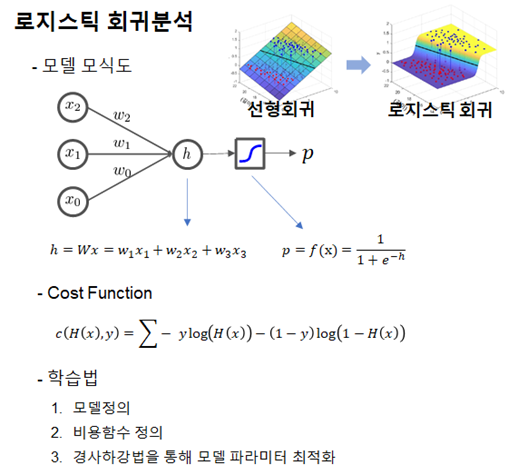

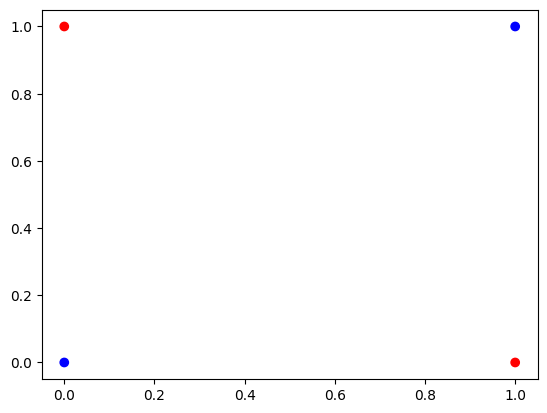

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 랜덤 시드 설정
tf.random.set_seed(0)

# 데이터 생성
xdata = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tf.float32)
ydata = tf.constant([[0], [1], [1], [0]], dtype=tf.float32)

# 데이터 시각화
plt.scatter(xdata[:, 0], xdata[:, 1], color=['blue', 'red', 'red', 'blue'])
plt.show()

# 데이터셋 정의
dataset = tf.data.Dataset.from_tensor_slices((xdata, ydata)).batch(len(xdata))

# 손실 함수 정의
def loss_fn(y_true, y_pred):
    cost = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return cost

# 정확도 함수 정의
def accuracy_fn(y_true, y_pred):
    predicted = tf.cast(y_pred > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_true), dtype=tf.float32))
    return accuracy
  
# 모델 정의
def model(x):
    hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(x, W) + b))  # 로지스틱 회귀
    return hypothesis



#### 모델 학습

In [2]:
# 훈련 매개변수 및 변수 초기화
EPOCHS = 2000
W = tf.Variable(tf.random.normal([2, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W, b]))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
acc = accuracy_fn(ydata, model(xdata))
print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.7569
Iter:   200, Loss: 0.7471
Iter:   300, Loss: 0.7389
Iter:   400, Loss: 0.7320
Iter:   500, Loss: 0.7261
Iter:   600, Loss: 0.7211
Iter:   700, Loss: 0.7169
Iter:   800, Loss: 0.7133
Iter:   900, Loss: 0.7103
Iter:  1000, Loss: 0.7077
Iter:  1100, Loss: 0.7055
Iter:  1200, Loss: 0.7037
Iter:  1300, Loss: 0.7021
Iter:  1400, Loss: 0.7007
Iter:  1500, Loss: 0.6996
Iter:  1600, Loss: 0.6986
Iter:  1700, Loss: 0.6978
Iter:  1800, Loss: 0.6971
Iter:  1900, Loss: 0.6965
Iter:  2000, Loss: 0.6960
Accuracy: 0.5000


#### 결과 가시화

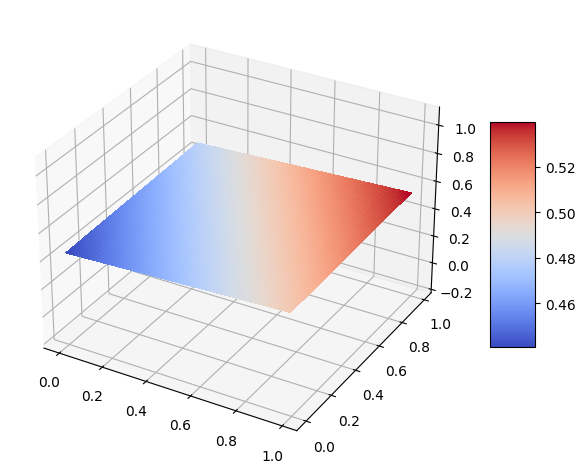

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# 모델 적용
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

#### 인공신경망 - Multilayer perceptron (MLP) 학습
##### 다층 신경망 (단순 선형)
 - Hidden Layer가 있어도 단순 선형 접합이면 최종 계산식에는 Hidden Layer가 없는 것과 동일함  
   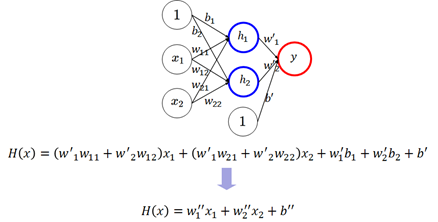


##### 다층 신경망 (비선형 Activation 함수)
 - 비선형 Activation 함수에 의해 Hidden layer의 역할이 보존됨  
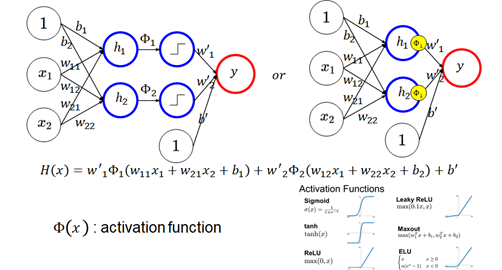

#### 다층 신경망 (MLP)를 이용한 이진 분류
- XOR logtic gate 학습  
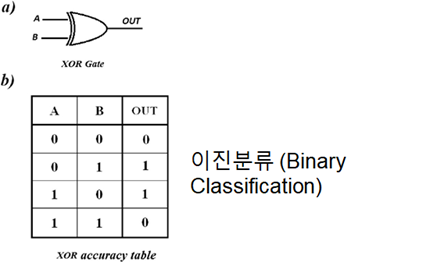
  
- 마지막 Layer에 Sigmoid Activation Function 을 추가로 두어 최종 값의 범위를 0 ~ 1 변환  

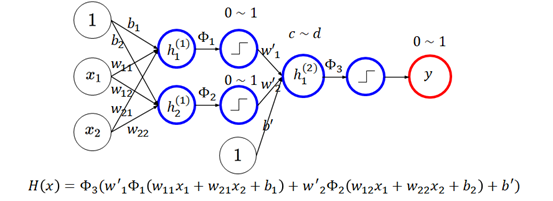

In [24]:
# 가중치와 편향 초기화
W1 = tf.Variable(tf.random.normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random.normal([2]), name='bias1')
W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

# 훈련 가능한 변수 목록
trainable_vars = [W1, b1, W2, b2]

# 모델 정의
def model(x):
    l1 = tf.sigmoid(tf.matmul(x, W1) + b1)
    hypothesis = tf.sigmoid(tf.matmul(l1, W2) + b2) 
    return hypothesis

# Binary Classification 문제 이기 때문에 Logistic Regression에서 사용했던 Loss, Accuracy 함수 그대로 사용

# 훈련 설정
EPOCHS = 3000
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, trainable_vars)
        optimizer.apply_gradients(zip(grads, trainable_vars))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
        

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.6890
Iter:   200, Loss: 0.6762
Iter:   300, Loss: 0.6413
Iter:   400, Loss: 0.5892
Iter:   500, Loss: 0.5502
Iter:   600, Loss: 0.5273
Iter:   700, Loss: 0.5106
Iter:   800, Loss: 0.4602
Iter:   900, Loss: 0.2892
Iter:  1000, Loss: 0.1524
Iter:  1100, Loss: 0.0936
Iter:  1200, Loss: 0.0658
Iter:  1300, Loss: 0.0503
Iter:  1400, Loss: 0.0405
Iter:  1500, Loss: 0.0338
Iter:  1600, Loss: 0.0289
Iter:  1700, Loss: 0.0253
Iter:  1800, Loss: 0.0224
Iter:  1900, Loss: 0.0201
Iter:  2000, Loss: 0.0183
Iter:  2100, Loss: 0.0167
Iter:  2200, Loss: 0.0154
Iter:  2300, Loss: 0.0143
Iter:  2400, Loss: 0.0133
Iter:  2500, Loss: 0.0124
Iter:  2600, Loss: 0.0117
Iter:  2700, Loss: 0.0110
Iter:  2800, Loss: 0.0104
Iter:  2900, Loss: 0.0099
Iter:  3000, Loss: 0.0094
Accuracy: 1.0000


#### 결과 가시화

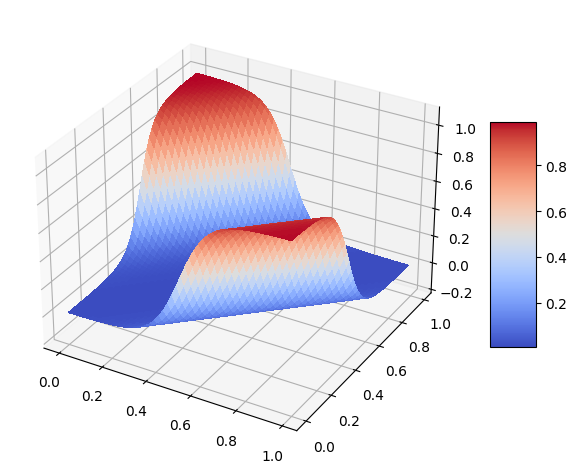

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# 모델 적용
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


#### Tensorflow model을 활용한 간단한 MLP 모델 구현


In [30]:
# # 이전 세션 클리어
tf.keras.backend.clear_session()

# model정의의 input_shape = (2,) --> 뒤의 실제 model의 input_data 차원과 비교.
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

 model.summary()
# 훈련 설정
EPOCHS = 3000
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            #실제 model의 input data의 차원 (4, 2) = (batch size, input_shape)
            #Tensorflow의 model은 기본적으로 batch가 있을 것을 가정하고 구현됨.
            pred = model(x)
            loss = loss_fn(labels, pred)
            
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))     

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.6678
Iter:   200, Loss: 0.6240
Iter:   300, Loss: 0.5565
Iter:   400, Loss: 0.4773
Iter:   500, Loss: 0.3438
Iter:   600, Loss: 0.1976
Iter:   700, Loss: 0.1186
Iter:   800, Loss: 0.0804
Iter:   900, Loss: 0.0596
Iter:  1000, Loss: 0.0469
Iter:  1100, Loss: 0.0385
Iter:  1200, Loss: 0.0326
Iter:  1300, Loss: 0.0281
Iter:  1400, Loss: 0.0247
Iter:  1500, Loss: 0.0221
Iter:  1600, Loss: 0.0199
Iter:  1700, Loss: 0.0181
Iter:  1800, Loss: 0.0166
Iter:  1900, Loss: 0.0153
Iter:  2000, Loss: 0.0142
Iter:  2100, Loss: 0.0132
Iter:  2200, Loss: 0.0124
Iter:  2300, Loss: 0.0117
Iter:  2400, Loss: 0.0110
Iter:  2500, Loss: 0.0104
Iter:  2600, Loss: 0.0099
Iter:  2700, Loss: 0.0094
Iter:  2800, Loss: 0.0090
Iter:  2900, Loss: 0.0086
Iter:  3000, Loss: 0.0082
Accuracy: 1.0000


(100, 100) (100, 100)
(10000, 2)


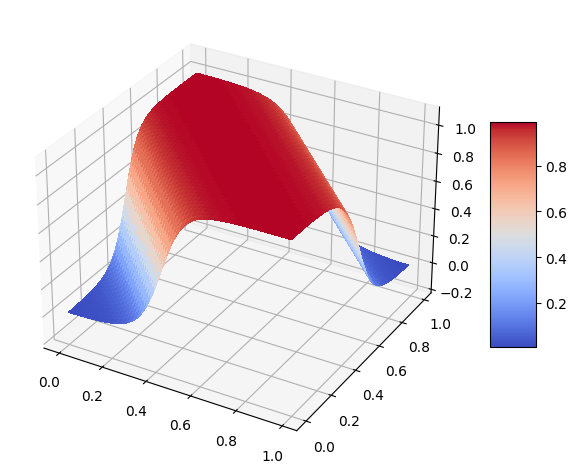

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)
#print(X1.shape, X2.shape)

# 모델 적용
#print(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).shape)
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


### Tensorflow model 설정
Tensorflow를 이용한 3가지 MLP 모델 정의 방법

1. 세부적인 내용 까지 모두 구현

In [6]:
# 가중치와 편향 초기화
W1 = tf.Variable(tf.random.normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random.normal([2]), name='bias1')
W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

# 훈련 가능한 변수 목록
trainable_vars = [W1, b1, W2, b2]

# 모델 정의
def model(x):
    l1 = tf.sigmoid(tf.matmul(x, W1) + b1)
    hypothesis = tf.sigmoid(tf.matmul(l1, W2) + b2)  # 수정: l1을 사용
    retu

# 손실 함수 정의
def loss_fn(y_true, y_pred):
    cost = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return cost

# 정확도 함수 정의
def accuracy_fn(y_true, y_pred):
    predicted = tf.cast(y_pred > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_true), dtype=tf.float32))
    return accuracy
rn hypothesis

2. Tensorflow 함수를 이용해서 간단하게 정의

In [ ]:
# 모델 정의
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#손실 함수 정의
loss_fn = tf.keras.losses.BinaryCrossentropy()

# 정확도 함수 정의
accuracy_fn = tf.keras.metrics.BinaryAccuracy()


In [ ]:
# 모델 학습

# 훈련 설정
EPOCHS = 2000
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
        

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


3. Tensorflow 함수를 이용해서 학습과정까지 단순화

In [ ]:
# 모델 정의
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

sgd_optimizer = tf.keras.optimizers.SGD(0.5)

model.compile(optimizer=sgd_optimizer,loss='binary_crossentropy', metrics= 'binary_accuracy')

model.fit(xdata, ydata, epoches=2000)

acc = tf.keras.metrics.BinaryAccuracy()        
acc.update_state(ydata, model(xdata))
print("Accuracy: {:.4f}".format(acc.result().numpy()))


#### Tensorflow Model 설정
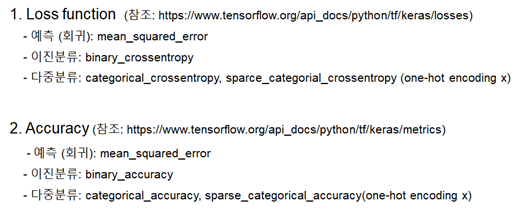

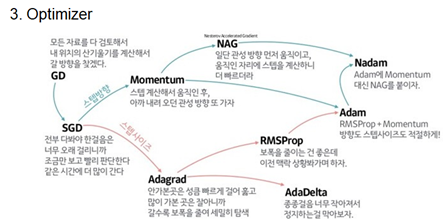

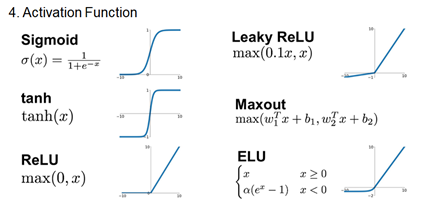

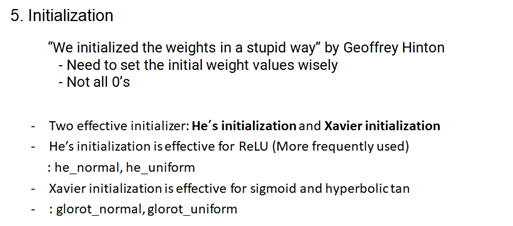

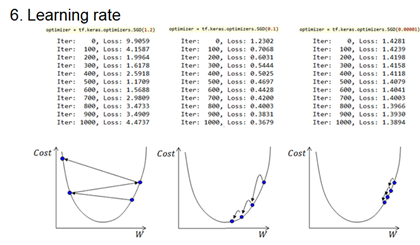

In [47]:
# Learning rate 
# 모델 정의
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#손실 함수 정의
loss_fn = tf.keras.losses.BinaryCrossentropy()

# 정확도 함수 정의
accuracy_fn = tf.keras.metrics.BinaryAccuracy()

# 훈련 설정
EPOCHS = 2000
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001) # Learning rate이 작아서 학습 속도가 느림
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.5) # 적절한 수준
#optimizer = tf.keras.optimizers.SGD(learning_rate=10) # 모델이 단순해서 overfitting이 일어나지 않음

# Learning rate 감소
Initial_learning_rate = 3.
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(Initial_learning_rate, 
                                                             decay_steps=100, 
                                                             decay_rate = 0.96, 
                                                             staircase=True)
optimizer = tf.keras.optimizers.SGD(lr_schedule)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
        

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.6577
Iter:   200, Loss: 0.1302
Iter:   300, Loss: 0.0464
Iter:   400, Loss: 0.0279
Iter:   500, Loss: 0.0200
Iter:   600, Loss: 0.0157
Iter:   700, Loss: 0.0130
Iter:   800, Loss: 0.0111
Iter:   900, Loss: 0.0098
Iter:  1000, Loss: 0.0088
Iter:  1100, Loss: 0.0080
Iter:  1200, Loss: 0.0073
Iter:  1300, Loss: 0.0068
Iter:  1400, Loss: 0.0064
Iter:  1500, Loss: 0.0060
Iter:  1600, Loss: 0.0057
Iter:  1700, Loss: 0.0054
Iter:  1800, Loss: 0.0052
Iter:  1900, Loss: 0.0049
Iter:  2000, Loss: 0.0048
Accuracy: 1.0000


## 정규화 (Regularization)

정규화는 오차에 대한 cost function에 model parameters 관련 항을 추가함.
(특정 계수 값이 너무 높아져 과접합이 되는 것을 방지)

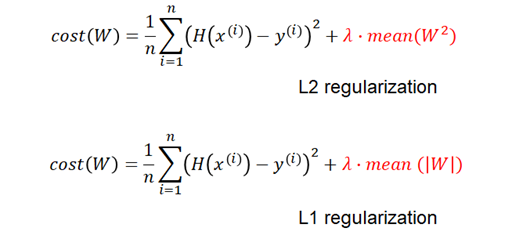

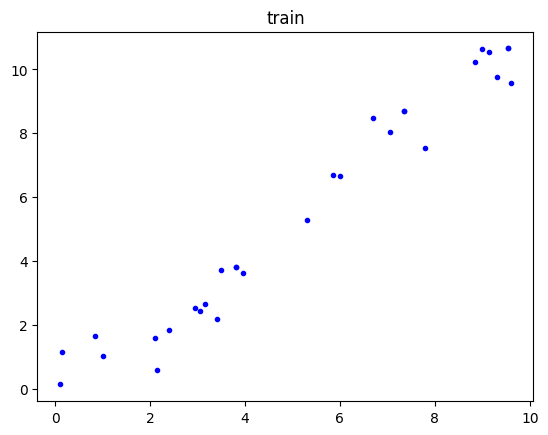

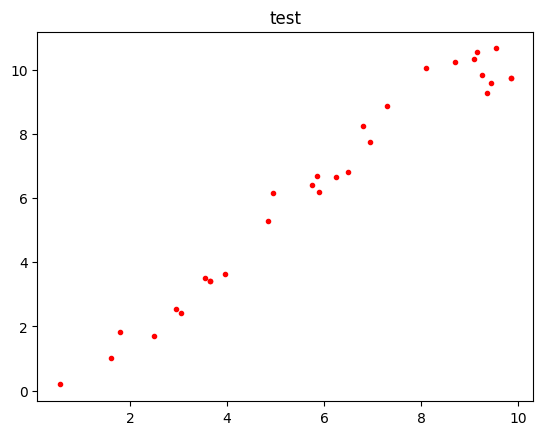

In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 랜덤 시드 설정
tf.random.set_seed(1)

# 데이터 불러오기
traindata = np.loadtxt('reg_traindata.csv', delimiter=',', dtype=np.float32)
testdata = np.loadtxt('reg_testdata.csv', delimiter=',', dtype=np.float32)

# 훈련 및 테스트 데이터 분할
x_train = traindata[:, [0]]
y_train = traindata[:, [-1]]
x_test = testdata[:, [0]]
y_test = testdata[:, [-1]]

# 훈련 데이터 시각화
plt.plot(x_train, y_train, 'b.')
plt.title('train')
plt.show()

# 테스트 데이터 시각화
plt.plot(x_test, y_test, 'r.')
plt.title('test')
plt.show()



In [50]:

# 모델 정의
tf.keras.backend.clear_session()
normal_init = tf.keras.initializers.RandomNormal(stddev=1)

model = tf.keras.Sequential([tf.keras.layers.Dense(units=300,
                                    activation='sigmoid',
                                    input_shape=(x_train.shape[1],),
                                    kernel_initializer=normal_init),
                        tf.keras.layers.Dense(units=300,
                                    activation='sigmoid',
                                    kernel_initializer=normal_init),
                        tf.keras.layers.Dense(units=300,
                                    activation='sigmoid',
                                    kernel_initializer=normal_init),
                        tf.keras.layers.Dense(units=1,
                                    kernel_initializer=normal_init)])    
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               600       
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 181501 (708.99 KB)
Trainable params: 181501 (708.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\users\park\appdata\local\programs\python\python38\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [51]:
dataset = tf.data.Dataset.from_tensor_slices ((x_train, y_train)). batch (len (x_train))

# 손실 함수 정의
def loss_fn(hypothesis, labels):
    return tf.reduce_mean(tf.keras.losses.MSE(labels, hypothesis)) + \
           0.1 * (tf.nn.l2_loss(model.trainable_variables[0]) + \
                  tf.nn.l2_loss(model.trainable_variables[2]) + \
                  tf.nn.l2_loss(model.trainable_variables[4]) + \
                  tf.nn.l2_loss(model.trainable_variables[6]))


def loss_wo_reg_fn(hypothesis, labels):
    return tf.reduce_mean(tf.keras.losses.MSE(labels, hypothesis))


Iter:   500, Loss_train: 0.2026, Loss_test: 0.4617
Iter:  1000, Loss_train: 0.1551, Loss_test: 0.5195
Iter:  1500, Loss_train: 0.1190, Loss_test: 0.7059
Iter:  2000, Loss_train: 0.1907, Loss_test: 0.5270
Iter:  2500, Loss_train: 0.1328, Loss_test: 0.6007
Iter:  3000, Loss_train: 0.0948, Loss_test: 0.6294
Iter:  3500, Loss_train: 0.3608, Loss_test: 0.3749
Iter:  4000, Loss_train: 0.1232, Loss_test: 0.5056
Iter:  4500, Loss_train: 0.1022, Loss_test: 0.5195
Iter:  5000, Loss_train: 0.0812, Loss_test: 0.5223


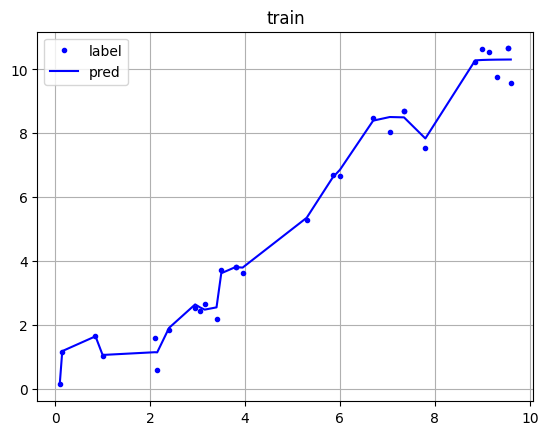

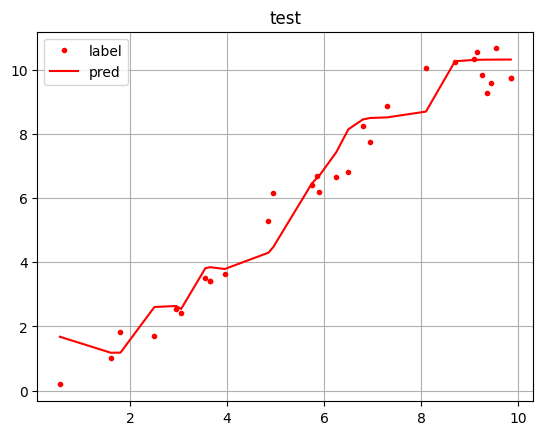

In [56]:
# 훈련 매개변수 설정
EPOCHS = 2500
optimizer = tf.keras.optimizers.Adam(0.02)

# 훈련 루프
fstr = "Iter: {:5}, Loss_train: {:1.4f}, Loss_test: {:1.4f}"
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            # Regularization이 없는 loss function 사용
            loss = loss_wo_reg_fn(pred, labels)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 500 == 0:
        print(fstr.format(step + 1, loss_wo_reg_fn(model(x_train), y_train), loss_wo_reg_fn(model(x_test), y_test)))

# 결과 시각화
plt.figure()
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, model(x_train), 'b-')
plt.title('train')
plt.legend(['label', 'pred'])
plt.grid()

plt.figure()
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, model(x_test), 'r-')
plt.title('test')
plt.legend(['label', 'pred'])
plt.grid()
plt.show()


Iter:   500, Loss_train: 23.5476, Loss_test: 23.3160
Iter:  1000, Loss_train: 6.1702, Loss_test: 6.1031
Iter:  1500, Loss_train: 3.1166, Loss_test: 3.0471
Iter:  2000, Loss_train: 2.4818, Loss_test: 2.4376
Iter:  2500, Loss_train: 2.2912, Loss_test: 2.2137
Iter:  3000, Loss_train: 2.3449, Loss_test: 2.2580
Iter:  3500, Loss_train: 2.2416, Loss_test: 2.1783
Iter:  4000, Loss_train: 2.3135, Loss_test: 2.2748
Iter:  4500, Loss_train: 2.2671, Loss_test: 2.2194
Iter:  5000, Loss_train: 2.2421, Loss_test: 2.1869


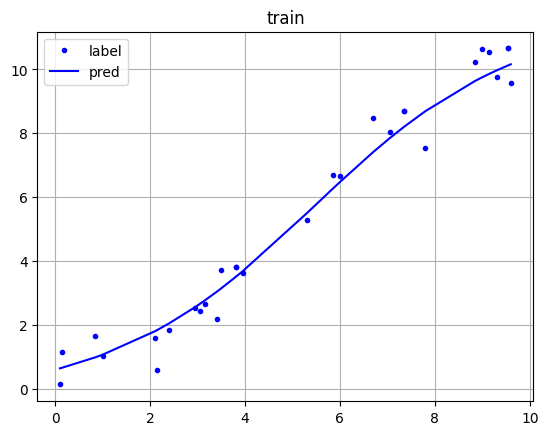

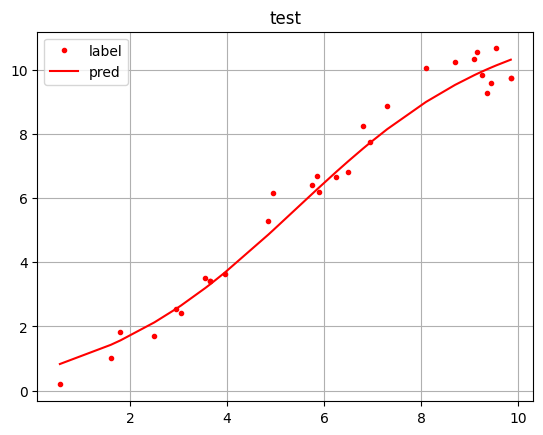

In [57]:
# 훈련 매개변수 설정
EPOCHS = 2500
optimizer = tf.keras.optimizers.Adam(0.02)

# 훈련 루프
fstr = "Iter: {:5}, Loss_train: {:1.4f}, Loss_test: {:1.4f}"
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            # Regularization이 포함된 Loss function 사용
            loss = loss_fn(pred, labels)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 500 == 0:
        print(fstr.format(step + 1, loss_fn(model(x_train), y_train), loss_fn(model(x_test), y_test)))

# 결과 시각화
plt.figure()
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, model(x_train), 'b-')
plt.title('train')
plt.legend(['label', 'pred'])
plt.grid()

plt.figure()
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, model(x_test), 'r-')
plt.title('test')
plt.legend(['label', 'pred'])
plt.grid()
plt.show()


### Tensorflow 내장 기능을 이용한 정규화 (Regularization)

In [58]:
from tensorflow.keras.regularizers import l2
# 모델 정의
normal_init = tf.keras.initializers.RandomNormal(stddev=1)

model = tf.keras.Sequential([tf.keras.layers.Dense(units=300,activation='sigmoid', input_shape=(x_train.shape[1],), 	kernel_initializer=normal_init, kernel_regularizer=l2(0.1)), 
	tf.keras.layers.Dense(units=300, activation='sigmoid', kernel_initializer=normal_init, kernel_regularizer=l2(0.1)), 
	tf.keras.layers.Dense(units=300, activation='sigmoid', kernel_initializer=normal_init, kernel_regularizer=l2(0.1)), 
	tf.keras.layers.Dense(units=1, kernel_initializer=normal_init, kernel_regularizer=l2(0.1))])    
model.summary()

EPOCHS = 2000
optimizer = tf.keras.optimizers.Adam(0.02)

#학습
model.compile(loss = 'mse', optimizer = optimizer, metrics=['mse'])
model.fit(dataset, epochs= EPOCHS)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               600       
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 dense_6 (Dense)             (None, 300)               90300     
                                                                 
 dense_7 (Dense)             (None, 1)                 301       
                                                                 
Total params: 181501 (708.99 KB)
Trainable params: 181501 (708.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
1/1 [==============================] - 0s 312ms/step - loss: 18679.1602 - mse: 649.4380
Epoch 2/2000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 76.5078 - mse: 10.3807
Epoch 329/5000
1/1 [==============================] - 0s 0s/step - loss: 72.0037 - mse: 4.1623
Epoch 330/5000
1/1 [==============================] - 0s 0s/step - loss: 80.2032 - mse: 11.0550
Epoch 331/5000
1/1 [==============================] - 0s 16ms/step - loss: 83.9211 - mse: 13.9084
Epoch 332/5000
1/1 [==============================] - 0s 0s/step - loss: 78.5434 - mse: 8.0621
Epoch 333/5000
1/1 [==============================] - 0s 0s/step - loss: 74.1299 - mse: 3.4886
Epoch 334/5000
1/1 [==============================] - 0s 0s/step - loss: 75.3160 - mse: 4.7628
Epoch 335/5000
1/1 [==============================] - 0s 16ms/step - loss: 77.7095 - mse: 7.4698
Epoch 336/5000
1/1 [==============================] - 0s 0s/step - loss: 76.5659 - mse: 6.8503
Epoch 337/5000
1/1 [==============================] - 0s 0s/step - loss: 72.5931 - mse: 3.5721
Epoch 338/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 30.1411 - mse: 0.4900
Epoch 414/5000
1/1 [==============================] - 0s 16ms/step - loss: 30.4382 - mse: 1.1950
Epoch 415/5000
1/1 [==============================] - 0s 0s/step - loss: 29.7049 - mse: 0.8822
Epoch 416/5000
1/1 [==============================] - 0s 7ms/step - loss: 28.7586 - mse: 0.3599
Epoch 417/5000
1/1 [==============================] - 0s 0s/step - loss: 28.8717 - mse: 0.8879
Epoch 418/5000
1/1 [==============================] - 0s 0s/step - loss: 28.4788 - mse: 0.9006
Epoch 419/5000
1/1 [==============================] - 0s 16ms/step - loss: 27.5540 - mse: 0.3726
Epoch 420/5000
1/1 [==============================] - 0s 0s/step - loss: 27.5618 - mse: 0.7684
Epoch 421/5000
1/1 [==============================] - 0s 0s/step - loss: 27.2020 - mse: 0.7935
Epoch 422/5000
1/1 [==============================] - 0s 16ms/step - loss: 26.4198 - mse: 0.3901
Epoch 423/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 0s/step - loss: 14.7227 - mse: 0.4805
Epoch 499/5000
1/1 [==============================] - 0s 16ms/step - loss: 14.4820 - mse: 0.3604
Epoch 500/5000
1/1 [==============================] - 0s 0s/step - loss: 14.4509 - mse: 0.4459
Epoch 501/5000
1/1 [==============================] - 0s 16ms/step - loss: 14.4756 - mse: 0.5850
Epoch 502/5000
1/1 [==============================] - 0s 0s/step - loss: 14.4312 - mse: 0.6511
Epoch 503/5000
1/1 [==============================] - 0s 0s/step - loss: 14.3584 - mse: 0.6885
Epoch 504/5000
1/1 [==============================] - 0s 16ms/step - loss: 14.3514 - mse: 0.7882
Epoch 505/5000
1/1 [==============================] - 0s 0s/step - loss: 14.5862 - mse: 1.1296
Epoch 506/5000
1/1 [==============================] - 0s 0s/step - loss: 15.5081 - mse: 2.1530
Epoch 507/5000
1/1 [==============================] - 0s 16ms/step - loss: 18.5301 - mse: 5.2708
Epoch 508/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 11.8996 - mse: 1.1502
Epoch 584/5000
1/1 [==============================] - 0s 16ms/step - loss: 11.1872 - mse: 0.5846
Epoch 585/5000
1/1 [==============================] - 0s 0s/step - loss: 10.9872 - mse: 0.5219
Epoch 586/5000
1/1 [==============================] - 0s 0s/step - loss: 11.3256 - mse: 0.9993
Epoch 587/5000
1/1 [==============================] - 0s 0s/step - loss: 10.5572 - mse: 0.3753
Epoch 588/5000
1/1 [==============================] - 0s 16ms/step - loss: 10.8344 - mse: 0.7885
Epoch 589/5000
1/1 [==============================] - 0s 0s/step - loss: 10.5867 - mse: 0.6656
Epoch 590/5000
1/1 [==============================] - 0s 0s/step - loss: 10.2740 - mse: 0.4687
Epoch 591/5000
1/1 [==============================] - 0s 16ms/step - loss: 10.5086 - mse: 0.8148
Epoch 592/5000
1/1 [==============================] - 0s 0s/step - loss: 9.9479 - mse: 0.3649
Epoch 593/5000
1/1 [==============================] - 0s 16m

1/1 [==============================] - 0s 0s/step - loss: 7.1809 - mse: 0.6008
Epoch 670/5000
1/1 [==============================] - 0s 16ms/step - loss: 7.3306 - mse: 0.7766
Epoch 671/5000
1/1 [==============================] - 0s 0s/step - loss: 7.6379 - mse: 1.1069
Epoch 672/5000
1/1 [==============================] - 0s 0s/step - loss: 8.2996 - mse: 1.7932
Epoch 673/5000
1/1 [==============================] - 0s 16ms/step - loss: 9.5124 - mse: 3.0225
Epoch 674/5000
1/1 [==============================] - 0s 0s/step - loss: 11.1250 - mse: 4.6527
Epoch 675/5000
1/1 [==============================] - 0s 7ms/step - loss: 11.0112 - mse: 4.5263
Epoch 676/5000
1/1 [==============================] - 0s 0s/step - loss: 7.9245 - mse: 1.4157
Epoch 677/5000
1/1 [==============================] - 0s 0s/step - loss: 7.3972 - mse: 0.8344
Epoch 678/5000
1/1 [==============================] - 0s 16ms/step - loss: 8.6657 - mse: 2.0335
Epoch 679/5000
1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 0s/step - loss: 5.7929 - mse: 0.4594
Epoch 756/5000
1/1 [==============================] - 0s 0s/step - loss: 5.8404 - mse: 0.5185
Epoch 757/5000
1/1 [==============================] - 0s 7ms/step - loss: 5.9351 - mse: 0.6198
Epoch 758/5000
1/1 [==============================] - 0s 0s/step - loss: 6.1265 - mse: 0.8243
Epoch 759/5000
1/1 [==============================] - 0s 0s/step - loss: 6.4771 - mse: 1.1788
Epoch 760/5000
1/1 [==============================] - 0s 16ms/step - loss: 7.0990 - mse: 1.8165
Epoch 761/5000
1/1 [==============================] - 0s 0s/step - loss: 7.8452 - mse: 2.5603
Epoch 762/5000
1/1 [==============================] - 0s 0s/step - loss: 8.2572 - mse: 2.9865
Epoch 763/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.2469 - mse: 1.9588
Epoch 764/5000
1/1 [==============================] - 0s 0s/step - loss: 5.8138 - mse: 0.5170
Epoch 765/5000
1/1 [==============================] - 0s 0s/step - loss

1/1 [==============================] - 0s 0s/step - loss: 5.0915 - mse: 0.4100
Epoch 842/5000
1/1 [==============================] - 0s 16ms/step - loss: 5.0868 - mse: 0.4097
Epoch 843/5000
1/1 [==============================] - 0s 0s/step - loss: 5.0818 - mse: 0.4115
Epoch 844/5000
1/1 [==============================] - 0s 0s/step - loss: 5.0770 - mse: 0.4110
Epoch 845/5000
1/1 [==============================] - 0s 16ms/step - loss: 5.0722 - mse: 0.4131
Epoch 846/5000
1/1 [==============================] - 0s 0s/step - loss: 5.0673 - mse: 0.4124
Epoch 847/5000
1/1 [==============================] - 0s 0s/step - loss: 5.0623 - mse: 0.4143
Epoch 848/5000
1/1 [==============================] - 0s 16ms/step - loss: 5.0569 - mse: 0.4128
Epoch 849/5000
1/1 [==============================] - 0s 16ms/step - loss: 5.0518 - mse: 0.4145
Epoch 850/5000
1/1 [==============================] - 0s 7ms/step - loss: 5.0463 - mse: 0.4128
Epoch 851/5000
1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 0s/step - loss: 4.7151 - mse: 0.4089
Epoch 928/5000
1/1 [==============================] - 0s 0s/step - loss: 4.7119 - mse: 0.4089
Epoch 929/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.7087 - mse: 0.4092
Epoch 930/5000
1/1 [==============================] - 0s 0s/step - loss: 4.7057 - mse: 0.4094
Epoch 931/5000
1/1 [==============================] - 0s 0s/step - loss: 4.7023 - mse: 0.4095
Epoch 932/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.6989 - mse: 0.4092
Epoch 933/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6957 - mse: 0.4096
Epoch 934/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.6925 - mse: 0.4094
Epoch 935/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6895 - mse: 0.4098
Epoch 936/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6864 - mse: 0.4099
Epoch 937/5000
1/1 [==============================] - 0s 16ms/step - 

1/1 [==============================] - 0s 0s/step - loss: 4.4908 - mse: 0.4180
Epoch 1014/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4886 - mse: 0.4179
Epoch 1015/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.4867 - mse: 0.4182
Epoch 1016/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4846 - mse: 0.4182
Epoch 1017/5000
1/1 [==============================] - 0s 17ms/step - loss: 4.4826 - mse: 0.4183
Epoch 1018/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.4807 - mse: 0.4185
Epoch 1019/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4786 - mse: 0.4185
Epoch 1020/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4767 - mse: 0.4186
Epoch 1021/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.4747 - mse: 0.4188
Epoch 1022/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.4730 - mse: 0.4190
Epoch 1023/5000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 7ms/step - loss: 4.3522 - mse: 0.4264
Epoch 1099/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3510 - mse: 0.4262
Epoch 1100/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3497 - mse: 0.4267
Epoch 1101/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3484 - mse: 0.4263
Epoch 1102/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3472 - mse: 0.4268
Epoch 1103/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3459 - mse: 0.4266
Epoch 1104/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3447 - mse: 0.4270
Epoch 1105/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3435 - mse: 0.4269
Epoch 1106/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3420 - mse: 0.4268
Epoch 1107/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3408 - mse: 0.4268
Epoch 1108/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 4.2851 - mse: 0.4489
Epoch 1184/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2866 - mse: 0.4578
Epoch 1185/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2875 - mse: 0.4532
Epoch 1186/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2883 - mse: 0.4621
Epoch 1187/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2888 - mse: 0.4568
Epoch 1188/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2889 - mse: 0.4656
Epoch 1189/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2888 - mse: 0.4593
Epoch 1190/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2886 - mse: 0.4677
Epoch 1191/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2881 - mse: 0.4608
Epoch 1192/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2877 - mse: 0.4689
Epoch 1193/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 16ms/step - loss: 4.2165 - mse: 0.4484
Epoch 1269/5000
1/1 [==============================] - 0s 1ms/step - loss: 4.2125 - mse: 0.4402
Epoch 1270/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2095 - mse: 0.4411
Epoch 1271/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2072 - mse: 0.4366
Epoch 1272/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2056 - mse: 0.4379
Epoch 1273/5000
1/1 [==============================] - 0s 15ms/step - loss: 4.2045 - mse: 0.4361
Epoch 1274/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2033 - mse: 0.4372
Epoch 1275/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2025 - mse: 0.4366
Epoch 1276/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2019 - mse: 0.4378
Epoch 1277/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2013 - mse: 0.4378
Epoch 1278/5000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 0s/step - loss: 4.1822 - mse: 0.4484
Epoch 1354/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1881 - mse: 0.4515
Epoch 1355/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1885 - mse: 0.4591
Epoch 1356/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.1836 - mse: 0.4498
Epoch 1357/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1771 - mse: 0.4475
Epoch 1358/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1735 - mse: 0.4421
Epoch 1359/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1740 - mse: 0.4415
Epoch 1360/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1769 - mse: 0.4464
Epoch 1361/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1789 - mse: 0.4438
Epoch 1362/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1785 - mse: 0.4474
Epoch 1363/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 0s/step - loss: 4.1803 - mse: 0.4730
Epoch 1439/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2032 - mse: 0.4839
Epoch 1440/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.2123 - mse: 0.5064
Epoch 1441/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2061 - mse: 0.4868
Epoch 1442/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1885 - mse: 0.4826
Epoch 1443/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1686 - mse: 0.4541
Epoch 1444/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1528 - mse: 0.4466
Epoch 1445/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1454 - mse: 0.4378
Epoch 1446/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1460 - mse: 0.4395
Epoch 1447/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1525 - mse: 0.4511
Epoch 1448/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 0s/step - loss: 4.2924 - mse: 0.5556
Epoch 1524/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3784 - mse: 0.6595
Epoch 1525/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2474 - mse: 0.5066
Epoch 1526/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1778 - mse: 0.4382
Epoch 1527/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2745 - mse: 0.5417
Epoch 1528/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3041 - mse: 0.5504
Epoch 1529/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2037 - mse: 0.4666
Epoch 1530/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1612 - mse: 0.4229
Epoch 1531/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2245 - mse: 0.4823
Epoch 1532/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.2546 - mse: 0.5353
Epoch 1533/5000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 0s/step - loss: 4.1824 - mse: 0.5158
Epoch 1609/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1522 - mse: 0.4718
Epoch 1610/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1281 - mse: 0.4566
Epoch 1611/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1153 - mse: 0.4384
Epoch 1612/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1130 - mse: 0.4365
Epoch 1613/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1190 - mse: 0.4455
Epoch 1614/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1306 - mse: 0.4507
Epoch 1615/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1451 - mse: 0.4752
Epoch 1616/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1629 - mse: 0.4814
Epoch 1617/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1832 - mse: 0.5175
Epoch 1618/5000
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 0s/step - loss: 4.1552 - mse: 0.4829
Epoch 1694/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2250 - mse: 0.5356
Epoch 1695/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2517 - mse: 0.5804
Epoch 1696/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2201 - mse: 0.5274
Epoch 1697/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1582 - mse: 0.4811
Epoch 1698/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1159 - mse: 0.4311
Epoch 1699/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1137 - mse: 0.4310
Epoch 1700/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1418 - mse: 0.4691
Epoch 1701/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1754 - mse: 0.4928
Epoch 1702/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1918 - mse: 0.5289
Epoch 1703/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 0s/step - loss: 4.5938 - mse: 0.8966
Epoch 1779/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1830 - mse: 0.5088
Epoch 1780/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1938 - mse: 0.5124
Epoch 1781/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4585 - mse: 0.7427
Epoch 1782/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.4246 - mse: 0.7435
Epoch 1783/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1822 - mse: 0.4735
Epoch 1784/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1760 - mse: 0.4671
Epoch 1785/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3419 - mse: 0.6564
Epoch 1786/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3218 - mse: 0.6079
Epoch 1787/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1563 - mse: 0.4673
Epoch 1788/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 4.1160 - mse: 0.4468
Epoch 1864/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1590 - mse: 0.5025
Epoch 1865/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1989 - mse: 0.5267
Epoch 1866/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2154 - mse: 0.5659
Epoch 1867/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2127 - mse: 0.5454
Epoch 1868/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1886 - mse: 0.5443
Epoch 1869/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1588 - mse: 0.5000
Epoch 1870/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1272 - mse: 0.4846
Epoch 1871/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1034 - mse: 0.4523
Epoch 1872/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0890 - mse: 0.4445
Epoch 1873/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 7ms/step - loss: 4.4197 - mse: 0.7956
Epoch 1949/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4149 - mse: 0.7540
Epoch 1950/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3462 - mse: 0.7178
Epoch 1951/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2507 - mse: 0.5919
Epoch 1952/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1467 - mse: 0.5073
Epoch 1953/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0878 - mse: 0.4371
Epoch 1954/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0924 - mse: 0.4400
Epoch 1955/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1398 - mse: 0.4980
Epoch 1956/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1912 - mse: 0.5315
Epoch 1957/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2124 - mse: 0.5749
Epoch 1958/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 4.0794 - mse: 0.4329
Epoch 2034/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0842 - mse: 0.4442
Epoch 2035/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0900 - mse: 0.4446
Epoch 2036/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0962 - mse: 0.4612
Epoch 2037/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1046 - mse: 0.4619
Epoch 2038/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1152 - mse: 0.4859
Epoch 2039/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1316 - mse: 0.4905
Epoch 2040/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.1548 - mse: 0.5302
Epoch 2041/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1933 - mse: 0.5504
Epoch 2042/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2480 - mse: 0.6270
Epoch 2043/5000
1/1 [==============================] - 0s 16m

1/1 [==============================] - 0s 16ms/step - loss: 6.1825 - mse: 2.5829
Epoch 2119/5000
1/1 [==============================] - 0s 0s/step - loss: 6.8775 - mse: 3.1693
Epoch 2120/5000
1/1 [==============================] - 0s 0s/step - loss: 5.7815 - mse: 2.1403
Epoch 2121/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3167 - mse: 0.5805
Epoch 2122/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6493 - mse: 0.8611
Epoch 2123/5000
1/1 [==============================] - 0s 7ms/step - loss: 5.1315 - mse: 1.3715
Epoch 2124/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3352 - mse: 0.5081
Epoch 2125/5000
1/1 [==============================] - 0s 0s/step - loss: 4.7068 - mse: 0.8472
Epoch 2126/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.6901 - mse: 0.8739
Epoch 2127/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2918 - mse: 0.4535
Epoch 2128/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 16ms/step - loss: 4.0607 - mse: 0.4290
Epoch 2204/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0658 - mse: 0.4372
Epoch 2205/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0790 - mse: 0.4451
Epoch 2206/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0976 - mse: 0.4738
Epoch 2207/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1247 - mse: 0.4889
Epoch 2208/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1636 - mse: 0.5444
Epoch 2209/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2322 - mse: 0.5933
Epoch 2210/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3435 - mse: 0.7308
Epoch 2211/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.5601 - mse: 0.9133
Epoch 2212/5000
1/1 [==============================] - 0s 0s/step - loss: 4.8852 - mse: 1.2813
Epoch 2213/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 16ms/step - loss: 4.7099 - mse: 0.6892
Epoch 2289/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.5055 - mse: 0.5179
Epoch 2290/5000
1/1 [==============================] - 0s 0s/step - loss: 4.8851 - mse: 0.9702
Epoch 2291/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2876 - mse: 0.3874
Epoch 2292/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6594 - mse: 0.7858
Epoch 2293/5000
1/1 [==============================] - 0s 0s/step - loss: 4.5403 - mse: 0.7454
Epoch 2294/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2320 - mse: 0.4655
Epoch 2295/5000
1/1 [==============================] - 0s 0s/step - loss: 4.5853 - mse: 0.8309
Epoch 2296/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4117 - mse: 0.7102
Epoch 2297/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1819 - mse: 0.4860
Epoch 2298/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 7ms/step - loss: 4.5510 - mse: 0.9032
Epoch 2374/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4634 - mse: 0.8487
Epoch 2375/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3116 - mse: 0.6635
Epoch 2376/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1369 - mse: 0.5077
Epoch 2377/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0670 - mse: 0.4288
Epoch 2378/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1253 - mse: 0.4795
Epoch 2379/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2165 - mse: 0.5880
Epoch 2380/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2403 - mse: 0.5895
Epoch 2381/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1723 - mse: 0.5428
Epoch 2382/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0918 - mse: 0.4495
Epoch 2383/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 4.1277 - mse: 0.4879
Epoch 2459/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1351 - mse: 0.4893
Epoch 2460/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1192 - mse: 0.4934
Epoch 2461/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0940 - mse: 0.4637
Epoch 2462/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0712 - mse: 0.4525
Epoch 2463/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0606 - mse: 0.4413
Epoch 2464/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0629 - mse: 0.4428
Epoch 2465/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0732 - mse: 0.4563
Epoch 2466/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0854 - mse: 0.4585
Epoch 2467/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0926 - mse: 0.4716
Epoch 2468/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 4.3895 - mse: 0.7458
Epoch 2544/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1814 - mse: 0.5108
Epoch 2545/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0914 - mse: 0.4261
Epoch 2546/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2339 - mse: 0.5817
Epoch 2547/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3033 - mse: 0.6288
Epoch 2548/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1719 - mse: 0.5222
Epoch 2549/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0710 - mse: 0.4170
Epoch 2550/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1237 - mse: 0.4696
Epoch 2551/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2205 - mse: 0.5883
Epoch 2552/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2389 - mse: 0.5920
Epoch 2553/5000
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 0s/step - loss: 4.1771 - mse: 0.5430
Epoch 2629/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2133 - mse: 0.5976
Epoch 2630/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1747 - mse: 0.5391
Epoch 2631/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0977 - mse: 0.4759
Epoch 2632/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0520 - mse: 0.4235
Epoch 2633/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0599 - mse: 0.4305
Epoch 2634/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1023 - mse: 0.4825
Epoch 2635/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.1496 - mse: 0.5181
Epoch 2636/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1790 - mse: 0.5662
Epoch 2637/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1940 - mse: 0.5658
Epoch 2638/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 0s/step - loss: 4.3327 - mse: 0.7024
Epoch 2714/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3049 - mse: 0.6987
Epoch 2715/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2597 - mse: 0.6302
Epoch 2716/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1812 - mse: 0.5717
Epoch 2717/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1062 - mse: 0.4821
Epoch 2718/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0551 - mse: 0.4400
Epoch 2719/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0454 - mse: 0.4292
Epoch 2720/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0700 - mse: 0.4493
Epoch 2721/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1091 - mse: 0.4987
Epoch 2722/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1478 - mse: 0.5237
Epoch 2723/5000
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 0s/step - loss: 4.4953 - mse: 0.8863
Epoch 2799/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1289 - mse: 0.4894
Epoch 2800/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1272 - mse: 0.4813
Epoch 2801/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3624 - mse: 0.7311
Epoch 2802/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3768 - mse: 0.7119
Epoch 2803/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1440 - mse: 0.4969
Epoch 2804/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0965 - mse: 0.4437
Epoch 2805/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2551 - mse: 0.5861
Epoch 2806/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2894 - mse: 0.6440
Epoch 2807/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1575 - mse: 0.4961
Epoch 2808/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 16ms/step - loss: 4.2589 - mse: 0.6538
Epoch 2884/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3417 - mse: 0.7133
Epoch 2885/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4297 - mse: 0.8282
Epoch 2886/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.5509 - mse: 0.9196
Epoch 2887/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6083 - mse: 1.0113
Epoch 2888/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6110 - mse: 0.9783
Epoch 2889/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4330 - mse: 0.8318
Epoch 2890/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2025 - mse: 0.5744
Epoch 2891/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0593 - mse: 0.4403
Epoch 2892/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1111 - mse: 0.4938
Epoch 2893/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 0s/step - loss: 4.0654 - mse: 0.4495
Epoch 2969/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1163 - mse: 0.5097
Epoch 2970/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1761 - mse: 0.5554
Epoch 2971/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2290 - mse: 0.6252
Epoch 2972/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.2882 - mse: 0.6646
Epoch 2973/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3359 - mse: 0.7351
Epoch 2974/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.3962 - mse: 0.7715
Epoch 2975/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4226 - mse: 0.8248
Epoch 2976/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4345 - mse: 0.8094
Epoch 2977/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3634 - mse: 0.7645
Epoch 2978/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 16ms/step - loss: 4.0699 - mse: 0.4444
Epoch 3054/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1472 - mse: 0.5138
Epoch 3055/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.1939 - mse: 0.5804
Epoch 3056/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1835 - mse: 0.5579
Epoch 3057/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1265 - mse: 0.5206
Epoch 3058/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0706 - mse: 0.4583
Epoch 3059/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0381 - mse: 0.4343
Epoch 3060/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0352 - mse: 0.4330
Epoch 3061/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0560 - mse: 0.4500
Epoch 3062/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0917 - mse: 0.4937
Epoch 3063/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 16ms/step - loss: 4.1444 - mse: 0.5335
Epoch 3139/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2147 - mse: 0.6222
Epoch 3140/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3368 - mse: 0.7259
Epoch 3141/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.5138 - mse: 0.9289
Epoch 3142/5000
1/1 [==============================] - 0s 0s/step - loss: 4.8175 - mse: 1.1980
Epoch 3143/5000
1/1 [==============================] - 0s 0s/step - loss: 5.1118 - mse: 1.5293
Epoch 3144/5000
1/1 [==============================] - 0s 16ms/step - loss: 5.3767 - mse: 1.7383
Epoch 3145/5000
1/1 [==============================] - 0s 0s/step - loss: 5.0526 - mse: 1.4519
Epoch 3146/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4210 - mse: 0.7678
Epoch 3147/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0917 - mse: 0.4382
Epoch 3148/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 4.2622 - mse: 0.6414
Epoch 3224/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2531 - mse: 0.6519
Epoch 3225/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2364 - mse: 0.6164
Epoch 3226/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1905 - mse: 0.5905
Epoch 3227/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1375 - mse: 0.5243
Epoch 3228/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0810 - mse: 0.4823
Epoch 3229/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0420 - mse: 0.4381
Epoch 3230/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0288 - mse: 0.4287
Epoch 3231/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0391 - mse: 0.4417
Epoch 3232/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0634 - mse: 0.4593
Epoch 3233/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 4.2233 - mse: 0.6375
Epoch 3309/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2254 - mse: 0.6233
Epoch 3310/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2031 - mse: 0.6187
Epoch 3311/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1698 - mse: 0.5668
Epoch 3312/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1191 - mse: 0.5271
Epoch 3313/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0714 - mse: 0.4650
Epoch 3314/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0378 - mse: 0.4345
Epoch 3315/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0274 - mse: 0.4197
Epoch 3316/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0375 - mse: 0.4264
Epoch 3317/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0590 - mse: 0.4542
Epoch 3318/5000
1/1 [==============================] - 0s 0s/s

1/1 [==============================] - 0s 0s/step - loss: 4.0598 - mse: 0.4334
Epoch 3394/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1330 - mse: 0.5121
Epoch 3395/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2074 - mse: 0.6086
Epoch 3396/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2214 - mse: 0.6107
Epoch 3397/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1604 - mse: 0.5640
Epoch 3398/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0871 - mse: 0.4756
Epoch 3399/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0458 - mse: 0.4327
Epoch 3400/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0535 - mse: 0.4349
Epoch 3401/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0924 - mse: 0.4615
Epoch 3402/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1307 - mse: 0.5083
Epoch 3403/5000
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 0s/step - loss: 4.0921 - mse: 0.4047
Epoch 3479/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.2772 - mse: 0.6224
Epoch 3480/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3736 - mse: 0.7202
Epoch 3481/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1877 - mse: 0.5691
Epoch 3482/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0636 - mse: 0.4496
Epoch 3483/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1558 - mse: 0.5403
Epoch 3484/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2841 - mse: 0.6819
Epoch 3485/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2879 - mse: 0.6629
Epoch 3486/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1683 - mse: 0.5528
Epoch 3487/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0624 - mse: 0.4320
Epoch 3488/5000
1/1 [==============================] - 0s 16m

1/1 [==============================] - 0s 0s/step - loss: 4.2348 - mse: 0.5905
Epoch 3564/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3077 - mse: 0.6440
Epoch 3565/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2048 - mse: 0.5606
Epoch 3566/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0780 - mse: 0.4309
Epoch 3567/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0503 - mse: 0.4159
Epoch 3568/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1225 - mse: 0.5062
Epoch 3569/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2071 - mse: 0.5884
Epoch 3570/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2221 - mse: 0.6271
Epoch 3571/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1764 - mse: 0.5704
Epoch 3572/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0995 - mse: 0.5055
Epoch 3573/5000
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 0s/step - loss: 4.0457 - mse: 0.4488
Epoch 3649/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0323 - mse: 0.4302
Epoch 3650/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0234 - mse: 0.4269
Epoch 3651/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0182 - mse: 0.4213
Epoch 3652/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0153 - mse: 0.4229
Epoch 3653/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0137 - mse: 0.4233
Epoch 3654/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0131 - mse: 0.4250
Epoch 3655/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0129 - mse: 0.4269
Epoch 3656/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0136 - mse: 0.4271
Epoch 3657/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0158 - mse: 0.4312
Epoch 3658/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 0s/step - loss: 4.0529 - mse: 0.4526
Epoch 3734/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0529 - mse: 0.4498
Epoch 3735/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0528 - mse: 0.4605
Epoch 3736/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0543 - mse: 0.4591
Epoch 3737/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.0575 - mse: 0.4722
Epoch 3738/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0649 - mse: 0.4737
Epoch 3739/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0765 - mse: 0.4939
Epoch 3740/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0974 - mse: 0.5041
Epoch 3741/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1289 - mse: 0.5451
Epoch 3742/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1821 - mse: 0.5825
Epoch 3743/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 16ms/step - loss: 4.0431 - mse: 0.4491
Epoch 3819/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0605 - mse: 0.4656
Epoch 3820/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.1189 - mse: 0.5279
Epoch 3821/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1664 - mse: 0.5563
Epoch 3822/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1642 - mse: 0.5595
Epoch 3823/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1279 - mse: 0.5041
Epoch 3824/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0752 - mse: 0.4575
Epoch 3825/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0373 - mse: 0.4139
Epoch 3826/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0263 - mse: 0.4083
Epoch 3827/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0399 - mse: 0.4313
Epoch 3828/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 4.0332 - mse: 0.4122
Epoch 3904/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0686 - mse: 0.4475
Epoch 3905/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1454 - mse: 0.5385
Epoch 3906/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1772 - mse: 0.5627
Epoch 3907/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1359 - mse: 0.5404
Epoch 3908/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0715 - mse: 0.4713
Epoch 3909/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0265 - mse: 0.4358
Epoch 3910/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0215 - mse: 0.4325
Epoch 3911/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0485 - mse: 0.4560
Epoch 3912/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0920 - mse: 0.5064
Epoch 3913/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 4.1486 - mse: 0.5542
Epoch 3989/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2198 - mse: 0.6172
Epoch 3990/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2037 - mse: 0.6182
Epoch 3991/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1372 - mse: 0.5385
Epoch 3992/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0635 - mse: 0.4714
Epoch 3993/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0236 - mse: 0.4237
Epoch 3994/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0250 - mse: 0.4215
Epoch 3995/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0565 - mse: 0.4558
Epoch 3996/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.1049 - mse: 0.4959
Epoch 3997/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1601 - mse: 0.5646
Epoch 3998/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 16ms/step - loss: 4.0799 - mse: 0.4856
Epoch 4074/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0454 - mse: 0.4557
Epoch 4075/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0235 - mse: 0.4268
Epoch 4076/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0135 - mse: 0.4175
Epoch 4077/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0131 - mse: 0.4170
Epoch 4078/5000
1/1 [==============================] - 0s 1ms/step - loss: 4.0197 - mse: 0.4229
Epoch 4079/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0332 - mse: 0.4431
Epoch 4080/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0573 - mse: 0.4644
Epoch 4081/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1000 - mse: 0.5192
Epoch 4082/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1860 - mse: 0.5959
Epoch 4083/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 0s/step - loss: 6.3427 - mse: 2.6050
Epoch 4159/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6392 - mse: 0.8241
Epoch 4160/5000
1/1 [==============================] - 0s 16ms/step - loss: 6.5793 - mse: 2.7151
Epoch 4161/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6862 - mse: 0.7084
Epoch 4162/5000
1/1 [==============================] - 0s 7ms/step - loss: 6.1008 - mse: 1.9988
Epoch 4163/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6757 - mse: 0.5200
Epoch 4164/5000
1/1 [==============================] - 0s 0s/step - loss: 5.7971 - mse: 1.5751
Epoch 4165/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.6491 - mse: 0.3409
Epoch 4166/5000
1/1 [==============================] - 0s 0s/step - loss: 5.5783 - mse: 1.2172
Epoch 4167/5000
1/1 [==============================] - 0s 0s/step - loss: 4.6502 - mse: 0.3310
Epoch 4168/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 4.4023 - mse: 0.6739
Epoch 4244/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.4320 - mse: 0.6949
Epoch 4245/5000
1/1 [==============================] - 0s 12ms/step - loss: 4.1080 - mse: 0.4034
Epoch 4246/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2504 - mse: 0.5746
Epoch 4247/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4028 - mse: 0.7351
Epoch 4248/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1655 - mse: 0.5358
Epoch 4249/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0815 - mse: 0.4661
Epoch 4250/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2650 - mse: 0.6497
Epoch 4251/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3008 - mse: 0.7034
Epoch 4252/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1396 - mse: 0.5270
Epoch 4253/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 0s/step - loss: 4.2093 - mse: 0.5645
Epoch 4329/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0863 - mse: 0.4434
Epoch 4330/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0364 - mse: 0.4121
Epoch 4331/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0858 - mse: 0.4806
Epoch 4332/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1700 - mse: 0.5678
Epoch 4333/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2109 - mse: 0.6289
Epoch 4334/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1948 - mse: 0.6011
Epoch 4335/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1294 - mse: 0.5439
Epoch 4336/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0652 - mse: 0.4640
Epoch 4337/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.0299 - mse: 0.4239
Epoch 4338/5000
1/1 [==============================] - 0s 0

1/1 [==============================] - 0s 0s/step - loss: 4.0143 - mse: 0.4146
Epoch 4414/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0200 - mse: 0.4251
Epoch 4415/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0435 - mse: 0.4582
Epoch 4416/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0787 - mse: 0.4908
Epoch 4417/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1214 - mse: 0.5448
Epoch 4418/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1793 - mse: 0.5909
Epoch 4419/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2528 - mse: 0.6765
Epoch 4420/5000
1/1 [==============================] - 0s 0s/step - loss: 4.3691 - mse: 0.7723
Epoch 4421/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.5097 - mse: 0.9300
Epoch 4422/5000
1/1 [==============================] - 0s 0s/step - loss: 4.7095 - mse: 1.1012
Epoch 4423/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 4.2744 - mse: 0.6532
Epoch 4499/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1420 - mse: 0.5271
Epoch 4500/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0378 - mse: 0.4125
Epoch 4501/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0542 - mse: 0.4268
Epoch 4502/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1455 - mse: 0.5287
Epoch 4503/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2246 - mse: 0.6024
Epoch 4504/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2307 - mse: 0.6312
Epoch 4505/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1856 - mse: 0.5821
Epoch 4506/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1102 - mse: 0.5249
Epoch 4507/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0497 - mse: 0.4615
Epoch 4508/5000
1/1 [==============================] - 0s 16

1/1 [==============================] - 0s 0s/step - loss: 4.3331 - mse: 0.7460
Epoch 4584/5000
1/1 [==============================] - 0s 0s/step - loss: 4.4355 - mse: 0.8639
Epoch 4585/5000
1/1 [==============================] - 0s 0s/step - loss: 4.5596 - mse: 0.9613
Epoch 4586/5000
1/1 [==============================] - 0s 0s/step - loss: 4.5998 - mse: 1.0199
Epoch 4587/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.5472 - mse: 0.9385
Epoch 4588/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.3243 - mse: 0.7321
Epoch 4589/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0978 - mse: 0.4894
Epoch 4590/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0362 - mse: 0.4285
Epoch 4591/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1523 - mse: 0.5491
Epoch 4592/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2534 - mse: 0.6345
Epoch 4593/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 0s/step - loss: 4.0676 - mse: 0.4610
Epoch 4669/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1538 - mse: 0.5624
Epoch 4670/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2019 - mse: 0.6037
Epoch 4671/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1784 - mse: 0.5955
Epoch 4672/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1226 - mse: 0.5300
Epoch 4673/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0629 - mse: 0.4775
Epoch 4674/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0246 - mse: 0.4325
Epoch 4675/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0112 - mse: 0.4189
Epoch 4676/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0189 - mse: 0.4268
Epoch 4677/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0433 - mse: 0.4470
Epoch 4678/5000
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 0s/step - loss: 4.1344 - mse: 0.5208
Epoch 4754/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2616 - mse: 0.6538
Epoch 4755/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2397 - mse: 0.6126
Epoch 4756/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1006 - mse: 0.4834
Epoch 4757/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0271 - mse: 0.4076
Epoch 4758/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0793 - mse: 0.4609
Epoch 4759/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1689 - mse: 0.5662
Epoch 4760/5000
1/1 [==============================] - 0s 0s/step - loss: 4.2020 - mse: 0.5948
Epoch 4761/5000
1/1 [==============================] - 0s 7ms/step - loss: 4.1527 - mse: 0.5643
Epoch 4762/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0782 - mse: 0.4863
Epoch 4763/5000
1/1 [==============================] - 0s 0s/

1/1 [==============================] - 0s 0s/step - loss: 4.0544 - mse: 0.4341
Epoch 4839/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0508 - mse: 0.4318
Epoch 4840/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1543 - mse: 0.5316
Epoch 4841/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.2172 - mse: 0.6120
Epoch 4842/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1852 - mse: 0.5750
Epoch 4843/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0950 - mse: 0.5019
Epoch 4844/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0288 - mse: 0.4362
Epoch 4845/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0194 - mse: 0.4313
Epoch 4846/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0582 - mse: 0.4753
Epoch 4847/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1225 - mse: 0.5315
Epoch 4848/5000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 4.1175 - mse: 0.5411
Epoch 4924/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1091 - mse: 0.5198
Epoch 4925/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1007 - mse: 0.5170
Epoch 4926/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0969 - mse: 0.5021
Epoch 4927/5000
1/1 [==============================] - 0s 0s/step - loss: 4.0944 - mse: 0.5073
Epoch 4928/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.0967 - mse: 0.5020
Epoch 4929/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1018 - mse: 0.5181
Epoch 4930/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1148 - mse: 0.5251
Epoch 4931/5000
1/1 [==============================] - 0s 16ms/step - loss: 4.1334 - mse: 0.5565
Epoch 4932/5000
1/1 [==============================] - 0s 0s/step - loss: 4.1681 - mse: 0.5827
Epoch 4933/5000
1/1 [==============================] - 0s 0s

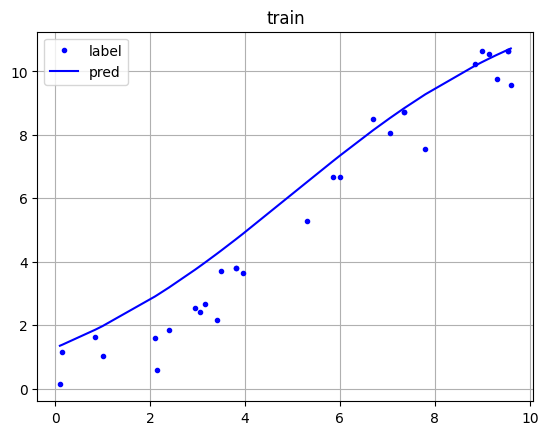

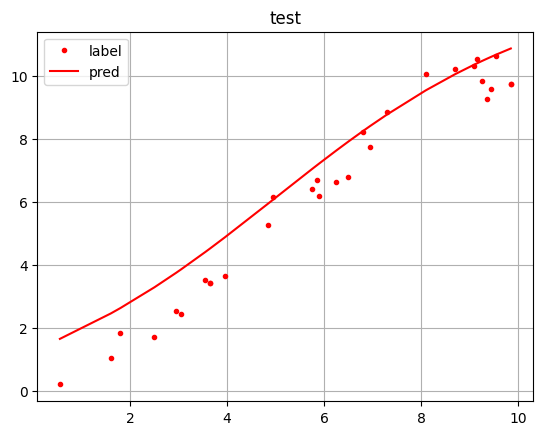

In [59]:
# 결과 시각화
plt.figure()
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, model(x_train), 'b-')
plt.title('train')
plt.legend(['label', 'pred'])
plt.grid()

plt.figure()
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, model(x_test), 'r-')
plt.title('test')
plt.legend(['label', 'pred'])
plt.grid()
plt.show()

### 실습. Stress-Strain Curve Fitting
Hot compression test의 Stress-Strain 데이터를 ANN으로 Fitting 해보시오  
파일이름: "stress_strain_data.csv"

In [ ]:
train_data = np.loadtxt('stress_strain_data.csv',delimiter=',')